In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import math
from utils import *
from dataset_utils import *
from dataset import *
from torchvision import transforms, datasets

In [6]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((32,32)),
])


mnist_transform = transforms.Compose([
    GrayscaleToRGB(),  # Convert grayscale to RGB
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Resize((32,32)),
])

In [7]:
# Load the Fashion MNIST dataset
fashion_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
cifar10_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
mnist_dataset = datasets.MNIST(root='./data', train=True, transform=mnist_transform, download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [8]:
for i, label_name in enumerate(fashion_dataset.classes):
    print(i, label_name)
fashion_selected_index = [3,4]
fashion_dress_coat = BinaryDatasetWrapper(fashion_dataset, fashion_selected_index)

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


In [9]:
for i, label_name in enumerate(mnist_dataset.classes):
    print(i, label_name)
mnist_selected_index_1 = [0,1]
mnist_selected_index_2 = [7,9]
mnist_hard_dataset = BinaryDatasetWrapper(mnist_dataset, mnist_selected_index_2)
mnist_easy_dataset = BinaryDatasetWrapper(mnist_dataset, mnist_selected_index_1)

0 0 - zero
1 1 - one
2 2 - two
3 3 - three
4 4 - four
5 5 - five
6 6 - six
7 7 - seven
8 8 - eight
9 9 - nine


In [10]:
for i, label_name in enumerate(cifar10_dataset.classes):
    print(i, label_name)
cifar_selected_index = [1,9]
cifar_car_truck = BinaryDatasetWrapper(cifar10_dataset, cifar_selected_index)

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


In [11]:
cifar_mnist01_dataset = DominioImage(cifar_car_truck, mnist_easy_dataset, 0.5, sample_size=2000, 
                 unique_spurious=False, concat_dim=1)

sample_size: 2000, dataset_max_size: 10000
Bias Check for Core Y: 0: 0.4984999895095825, 1:0.5015000104904175


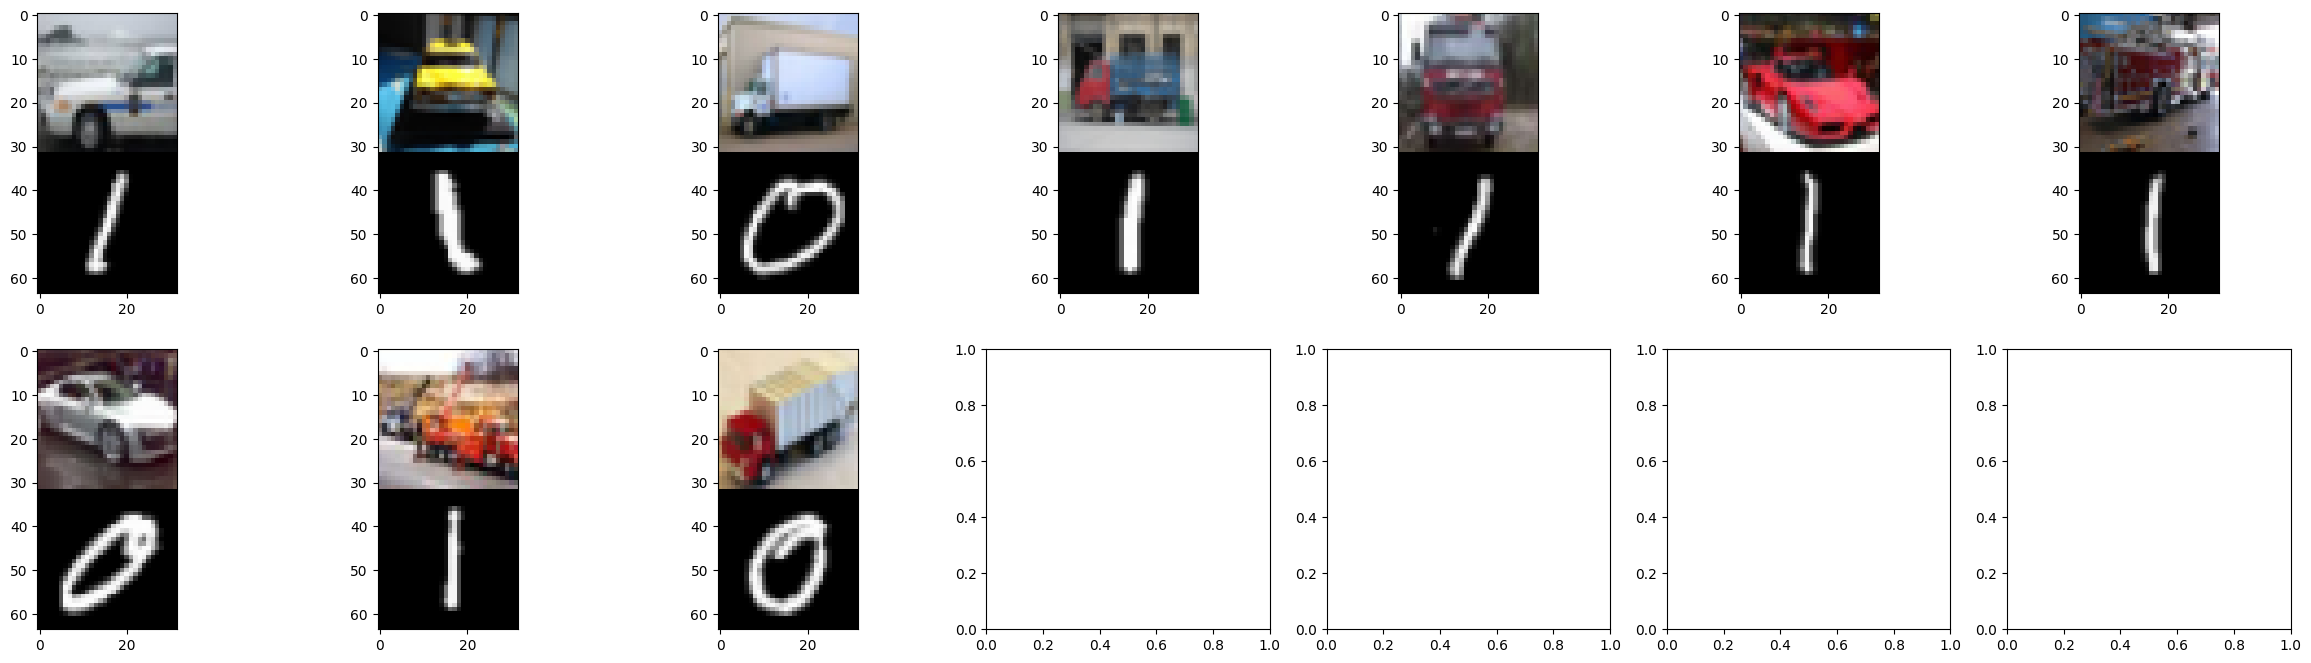

In [9]:
images = []
show_num = 10
for i in range(100, 100+show_num):
    images.append(cifar_mnist01_dataset[i][0])
required_rows = math.ceil(show_num/7)
fig, axes = plt.subplots(required_rows, 7, figsize=(30, 4 * required_rows))
for image, ax in zip(images, fig.get_axes()):
    ax.imshow(image.permute(1,2,0))